In [ ]:
## Importar Bibliotecas

import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#conectar ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Diego Pereira de Oliveira
# Link do inep sobre dados das escolas: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem-por-escola
# Esse é um Microdados do Exame Nacional do Ensino Médio por Escola dos anos de 2005 a 2015, sendo que foi escolhido os dados referentes aos Docentes.
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DB/SUP_DOCENTE_20191.CSV", engine='python',sep='|')

In [ ]:
df

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_DOCENTE_IES,ID_DOCENTE,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,NU_ANO_NASCIMENTO,NU_MES_NASCIMENTO,NU_DIA_NASCIMENTO,NU_IDADE,TP_COR_RACA,CO_PAIS_ORIGEM,TP_NACIONALIDADE,CO_UF_NASCIMENTO,CO_MUNICIPIO_NASCIMENTO,IN_DEFICIENCIA,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_INTELECTUAL,IN_ATUACAO_EAD,IN_ATUACAO_EXTENSAO,IN_ATUACAO_GESTAO,IN_ATUACAO_GRAD_PRESENCIAL,IN_ATUACAO_POS_EAD,IN_ATUACAO_POS_PRESENCIAL,IN_ATUACAO_SEQUENCIAL,IN_ATUACAO_PESQUISA,IN_BOLSA_PESQUISA,IN_SUBSTITUTO,IN_EXERCICIO_DATA_REFERENCIA,IN_VISITANTE,TP_VISITANTE_IFES_VINCULO
0,2019,1,1,1,1178692,EC5AA8E675AD29C50386820A3F3E9F97,1,5,1.0,2,1952,2,26,67,3,76,1,51.0,5103403.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN
1,2019,1,1,1,1178691,DDA849C5C6275470F9175628F502218E,1,4,1.0,2,1969,3,11,50,3,76,1,51.0,5103403.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
2,2019,1,1,1,1178693,2FF35722D03A9C6459FB5470F17F6709,1,3,1.0,2,1955,6,16,64,4,76,1,51.0,5103403.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
3,2019,1,1,1,1180431,C5AB8500E4EC686BFFF71870108EA10A,1,5,1.0,2,1965,8,29,54,1,76,1,51.0,5103403.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
4,2019,1,1,1,1178686,60FD7BF0222B1B16D19D9E4E08D4178A,1,5,1.0,2,1957,5,27,62,1,76,1,51.0,5103403.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37336,2019,546,5,1,646757,3F8CA0E1AA0A6E60A63AA205CF43B907,1,3,3.0,1,1959,11,25,60,1,76,1,35.0,3550308.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
37337,2019,546,5,1,646789,2584A738AB72D2D6D1DC7D4632D34821,1,4,3.0,1,1973,7,7,46,1,76,1,35.0,3550308.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
37338,2019,546,5,1,646830,DE5E0A608015F22BEA57E214A1AC1438,1,5,3.0,1,1976,6,9,43,1,76,1,51.0,5103502.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
37339,2019,546,5,1,646845,5CF019E2A271F96EE4E64187E7415D4A,1,4,4.0,2,1975,12,22,44,1,76,1,35.0,3550308.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN


#1 - Pré-processamento

In [ ]:
#crie um novo array com as colunas que você deseja
colunas_selecionadas = ['CO_IES', 'TP_CATEGORIA_ADMINISTRATIVA',
       'TP_ORGANIZACAO_ACADEMICA',
       'TP_SITUACAO', 'TP_ESCOLARIDADE', 'TP_REGIME_TRABALHO', 'TP_SEXO',
       'NU_ANO_NASCIMENTO', 'NU_MES_NASCIMENTO', 'NU_DIA_NASCIMENTO',
       'NU_IDADE', 'TP_COR_RACA', 'CO_PAIS_ORIGEM', 'TP_NACIONALIDADE',
       'CO_UF_NASCIMENTO', 'CO_MUNICIPIO_NASCIMENTO', 'IN_DEFICIENCIA'
       'IN_ATUACAO_EAD', 'IN_BOLSA_PESQUISA', 'IN_SUBSTITUTO']
      
novo_df = df.filter(items=colunas_selecionadas)

In [ ]:
novo_df

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,NU_ANO_NASCIMENTO,NU_MES_NASCIMENTO,NU_DIA_NASCIMENTO,NU_IDADE,TP_COR_RACA,CO_PAIS_ORIGEM,TP_NACIONALIDADE,CO_UF_NASCIMENTO,CO_MUNICIPIO_NASCIMENTO,IN_BOLSA_PESQUISA,IN_SUBSTITUTO
0,1,1,1,1,5,1.0,2,1952,2,26,67,3,76,1,51.0,5103403.0,1.0,0.0
1,1,1,1,1,4,1.0,2,1969,3,11,50,3,76,1,51.0,5103403.0,0.0,0.0
2,1,1,1,1,3,1.0,2,1955,6,16,64,4,76,1,51.0,5103403.0,0.0,0.0
3,1,1,1,1,5,1.0,2,1965,8,29,54,1,76,1,51.0,5103403.0,NaN,0.0
4,1,1,1,1,5,1.0,2,1957,5,27,62,1,76,1,51.0,5103403.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37336,546,5,1,1,3,3.0,1,1959,11,25,60,1,76,1,35.0,3550308.0,NaN,0.0
37337,546,5,1,1,4,3.0,1,1973,7,7,46,1,76,1,35.0,3550308.0,0.0,0.0
37338,546,5,1,1,5,3.0,1,1976,6,9,43,1,76,1,51.0,5103502.0,0.0,0.0
37339,546,5,1,1,4,4.0,2,1975,12,22,44,1,76,1,35.0,3550308.0,0.0,0.0


In [ ]:
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37341 entries, 0 to 37340
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CO_IES                       37341 non-null  int64  
 1   TP_CATEGORIA_ADMINISTRATIVA  37341 non-null  int64  
 2   TP_ORGANIZACAO_ACADEMICA     37341 non-null  int64  
 3   TP_SITUACAO                  37341 non-null  int64  
 4   TP_ESCOLARIDADE              37341 non-null  int64  
 5   TP_REGIME_TRABALHO           36546 non-null  float64
 6   TP_SEXO                      37341 non-null  int64  
 7   NU_ANO_NASCIMENTO            37341 non-null  int64  
 8   NU_MES_NASCIMENTO            37341 non-null  int64  
 9   NU_DIA_NASCIMENTO            37341 non-null  int64  
 10  NU_IDADE                     37341 non-null  int64  
 11  TP_COR_RACA                  37341 non-null  int64  
 12  CO_PAIS_ORIGEM               37341 non-null  int64  
 13  TP_NACIONALIDADE

In [ ]:
novo_df['IN_BOLSA_PESQUISA'].fillna(0.0,inplace=True)
novo_df['IN_SUBSTITUTO'].fillna(0.0,inplace=True)
novo_df['CO_MUNICIPIO_NASCIMENTO'].fillna(3550308.0,inplace=True)
novo_df['CO_UF_NASCIMENTO'].fillna(68944,inplace=True)
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37341 entries, 0 to 37340
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CO_IES                       37341 non-null  int64  
 1   TP_CATEGORIA_ADMINISTRATIVA  37341 non-null  int64  
 2   TP_ORGANIZACAO_ACADEMICA     37341 non-null  int64  
 3   TP_SITUACAO                  37341 non-null  int64  
 4   TP_ESCOLARIDADE              37341 non-null  int64  
 5   TP_REGIME_TRABALHO           36546 non-null  float64
 6   TP_SEXO                      37341 non-null  int64  
 7   NU_ANO_NASCIMENTO            37341 non-null  int64  
 8   NU_MES_NASCIMENTO            37341 non-null  int64  
 9   NU_DIA_NASCIMENTO            37341 non-null  int64  
 10  NU_IDADE                     37341 non-null  int64  
 11  TP_COR_RACA                  37341 non-null  int64  
 12  CO_PAIS_ORIGEM               37341 non-null  int64  
 13  TP_NACIONALIDADE

In [ ]:
colunas_selecionadas = ['TP_CATEGORIA_ADMINISTRATIVA', 'TP_ESCOLARIDADE', 'TP_SEXO']
      
df = df.filter(items=colunas_selecionadas)

In [ ]:
df

,TP_CATEGORIA_ADMINISTRATIVA,TP_ESCOLARIDADE,TP_SEXO
0,1,5,2
1,1,4,2
2,1,3,2
3,1,5,2
4,1,5,2
...,...,...,...
37336,5,3,1
37337,5,4,1
37338,5,5,1
37339,5,4,2


#2 - K-means

In [ ]:
#importar bibliotecas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#executar o algoritmo com a base de dados
kmeans = KMeans(n_clusters=10).fit(df)

In [ ]:
#visualizar os clusters que cada tupla foi definida
#não determinístico
X_clustered = kmeans.predict(df)
#criei uma copia do df para não alterar a predição
results = df[['TP_ESCOLARIDADE', 'TP_SEXO']].copy()
results['ClusterNumber'] = X_clustered
results

,TP_ESCOLARIDADE,TP_SEXO,ClusterNumber
0,5,2,2
1,4,2,2
2,3,2,2
3,5,2,2
4,5,2,2
...,...,...,...
37336,3,1,9
37337,4,1,3
37338,5,1,4
37339,4,2,0


In [ ]:
results.describe()

,TP_ESCOLARIDADE,TP_SEXO,ClusterNumber
count,37341.000000,37341.000000,37341.000000
mean,4.151924,1.516403,4.055060
std,0.724081,0.499738,2.770632
min,2.000000,1.000000,0.000000
25%,4.000000,1.000000,2.000000
50%,4.000000,2.000000,4.000000
75%,5.000000,2.000000,6.000000
max,5.000000,2.000000,9.000000


In [ ]:
print(kmeans.predict([[5,3,1]]))

[9]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#para cada centróide são calculados valores para cada coluna
#este é o modelo a ser exportado
centroids = kmeans.cluster_centers_
print(centroids)

[[5.         4.         2.        ]
 [3.98882994 5.         1.46383692]
 [1.943074   4.31271347 1.50322581]
 [5.         4.         1.        ]
 [5.         5.         1.        ]
 [3.98575223 3.69331079 2.        ]
 [5.         5.         2.        ]
 [5.         2.98639456 2.        ]
 [3.98185643 3.75019721 1.        ]
 [5.         2.99043062 1.        ]]


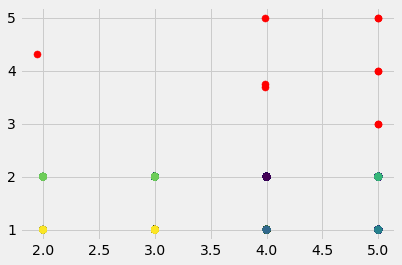

In [ ]:
#plota as tuplas no grafico
#escolher 2 colunas
#em vermelho estão os centroides
plt.scatter(df['TP_ESCOLARIDADE'], df['TP_SEXO'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
kmeans.n_iter_

3

##Avaliação do k-means

In [ ]:
#a partir do coeficiente de silhueta
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(df,kmeans.labels_ ).round(2)
kmeans_silhouette
#kmeans_labels_ são as classes preditas para cada exemplo
#round é para arredondar o resultado

0.82

In [ ]:
#cálculo do SSE
kmeans.inertia_

5125.065349854842

##Escolhendo o número de clusters

In [ ]:
#Baseado no SSE
#executa o algoritmo com vários valores de cluster e verifica qual o melhor valor de SSE (quanto menor, melhor)
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df)
  sse.append(kmeans.inertia_)

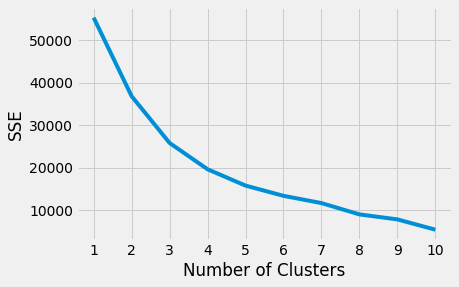

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
##Quanto mais se aproxima do y melhor o número de clusters

In [ ]:
#baseado no cálculo do coeficiente de silhueta
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(df)
   score = silhouette_score(df, kmeans.labels_)
   silhouette_coefficients.append(score)

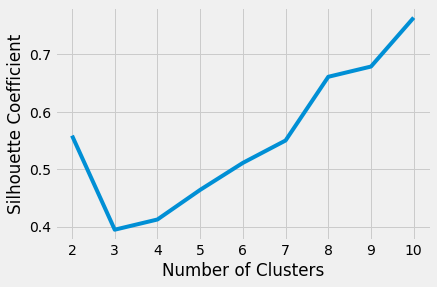

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#3 - DBScan

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3)
#o parâmetro 0.3 é a distância entre os elementos

In [ ]:
#treinamento
dbscan.fit(df)

DBSCAN(eps=0.3)

In [ ]:
#visualizar a predição
dbscan.labels_

array([0, 1, 2, ..., 8, 6, 6])

In [ ]:
#visualizar os clusters que cada tupla foi definida
X_clustered = dbscan.labels_
#criei uma copia do df para não alterar a predição
results = df[['TP_ESCOLARIDADE', 'TP_SEXO']].copy()
results['ClusterNumber'] = X_clustered
results

,TP_ESCOLARIDADE,TP_SEXO,ClusterNumber
0,5,2,0
1,4,2,1
2,3,2,2
3,5,2,0
4,5,2,0
...,...,...,...
37336,3,1,9
37337,4,1,5
37338,5,1,8
37339,4,2,6


In [ ]:
#visualizar a quantidade de clusters indicados
#se houver o valor -1 indica outliers
results['ClusterNumber'].value_counts()

 6     5412
 5     5173
 10    4097
 8     3972
 13    2835
 16    2818
 7     2610
 14    1895
 9     1863
 12    1646
 15    1247
 17     916
 22     607
 18     586
 20     443
 19     406
 21     215
 23     193
 0       80
 3       39
 27      37
 29      37
 24      36
 31      30
 28      25
 32      21
 25      19
 11      18
 1       16
 26      16
 30      15
 4        7
 2        6
-1        5
Name: ClusterNumber, dtype: int64

In [ ]:
#sugestão de cálculo de clusters e ruídos
#https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
labels = dbscan.labels_
n_clusters_ = len(np.unique(labels))
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 34
Estimated number of noise points: 5


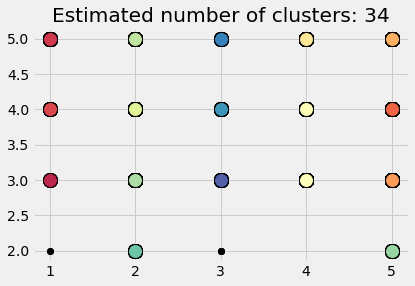

In [ ]:
#plotar gráfico com informações
import matplotlib.pyplot as plt
import numpy as np

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()



##Avaliação do DBScan

In [ ]:
#coeficiente de silhueta
dbscan_silhouette = silhouette_score(df, dbscan.labels_).round(2)
dbscan_silhouette

1.0